# **Customer Churn Analysis and Prediction of IBM Telco dataset**

**Project Description:** 
Customer churn is a common problem across all industries, significantly impacting both a business's revenue and growth. This project focuses on analyzing customer data from a Telco company to identify patterns and factors contributing to churn. By building a predictive model, I aim to forecast future churn and provide actionable insights that businesses can use to develop effective customer retention strategies.

**Project Objectives:**
1. **Data Collection and Cleaning:** Load and preprocess the [IBM Watson Telco Customer Churn dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).
2. **Exploratory Data Analysis (EDA):** Perform EDA to identify key factors influencing churn
3. **Model Building:** Develop a predictive model.
4. **Model Evaluation:** Assess model performance using appropriate metrics.
5. **Data Visualization and Reporting:** Visualize key findings and model predictions using data visualization tools.

## Data Collection and Cleaning

In [147]:
# Loading in data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\brenn\Documents\Career\Customer Churn Project\Telco_customer_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [149]:
#Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [151]:
# Converting 'TotalCharges' from object to float64.
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [153]:
# The conversion produced 11 rows with NaNs.
print(df['Total Charges'].isnull().sum())

11


In [155]:
# Filling the Nan values with the mean.
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean())
print(df['Total Charges'].isnull().sum())

0


In [157]:
# Checking for duplicates
print(df.duplicated().sum())

0


In [159]:
# Identifying missing values
# There are 5,174 existing customers who have not left, which explains why there are 5,174 missing values for the Churn Reason.
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [161]:
#Removing uncessessary columns
df = df.drop(columns=['Lat Long', 'Longitude', 'Country', 'Latitude'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [163]:
#Renamed existing column that predicts churn, as I will be developing my own predictive model for churn.
df.rename(columns={"Churn Score": "Original Churn Score"}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            7043 non-null   object 
 1   Count                 7043 non-null   int64  
 2   State                 7043 non-null   object 
 3   City                  7043 non-null   object 
 4   Zip Code              7043 non-null   int64  
 5   Gender                7043 non-null   object 
 6   Senior Citizen        7043 non-null   object 
 7   Partner               7043 non-null   object 
 8   Dependents            7043 non-null   object 
 9   Tenure Months         7043 non-null   int64  
 10  Phone Service         7043 non-null   object 
 11  Multiple Lines        7043 non-null   object 
 12  Internet Service      7043 non-null   object 
 13  Online Security       7043 non-null   object 
 14  Online Backup         7043 non-null   object 
 15  Device Protection    

In [165]:
df.columns = df.columns.str.strip()

In [242]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

## Exploratory Data Analysis

In [83]:
#Summary statistics
print(df.describe())
print(df['Gender'].value_counts())
print(df['Senior Citizen'].value_counts())
print(df['Partner'].value_counts())
print(df['Dependents'].value_counts())

        Count      Zip Code  Tenure Months  Monthly Charges  Total Charges  \
count  7043.0   7043.000000    7043.000000      7043.000000    7043.000000   
mean      1.0  93521.964646      32.371149        64.761692    2283.300441   
std       0.0   1865.794555      24.559481        30.090047    2265.000258   
min       1.0  90001.000000       0.000000        18.250000      18.800000   
25%       1.0  92102.000000       9.000000        35.500000     402.225000   
50%       1.0  93552.000000      29.000000        70.350000    1400.550000   
75%       1.0  95351.000000      55.000000        89.850000    3786.600000   
max       1.0  96161.000000      72.000000       118.750000    8684.800000   

       Churn Value  Original Churn Score         CLTV  
count  7043.000000           7043.000000  7043.000000  
mean      0.265370             58.699418  4400.295755  
std       0.441561             21.525131  1183.057152  
min       0.000000              5.000000  2003.000000  
25%       0.00000

In [85]:
# Number of unique values
df.nunique()

CustomerID              7043
Count                      1
State                      1
City                    1129
Zip Code                1652
Gender                     2
Senior Citizen             2
Partner                    2
Dependents                 2
Tenure Months             73
Phone Service              2
Multiple Lines             3
Internet Service           3
Online Security            3
Online Backup              3
Device Protection          3
Tech Support               3
Streaming TV               3
Streaming Movies           3
Contract                   3
Paperless Billing          2
Payment Method             4
Monthly Charges         1585
Total Charges           6531
Churn Label                2
Churn Value                2
Original Churn Score      85
CLTV                    3438
Churn Reason              20
dtype: int64

In [101]:
#A Churn Value of 1 indicates the customer has left.
df["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [103]:
df["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [205]:
#The most frequent reason for churn was attitude of support person followed by competitor offerings.
df["Churn Reason"].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [169]:
df.corr(numeric_only = True)

,Count,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,Original Churn Score,CLTV
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.001041,-0.004596,-0.001461,0.003346,-0.002769,-0.003562
Tenure Months,NaN,0.001041,1.000000,0.247900,0.824757,-0.352229,-0.224987,0.396406
Monthly Charges,NaN,-0.004596,0.247900,1.000000,0.650468,0.193356,0.133754,0.098693
Total Charges,NaN,-0.001461,0.824757,0.650468,1.000000,-0.199428,-0.124251,0.341384
Churn Value,NaN,0.003346,-0.352229,0.193356,-0.199428,1.000000,0.664897,-0.127463
Original Churn Score,NaN,-0.002769,-0.224987,0.133754,-0.124251,0.664897,1.000000,-0.079782
CLTV,NaN,-0.003562,0.396406,0.098693,0.341384,-0.127463,-0.079782,1.000000


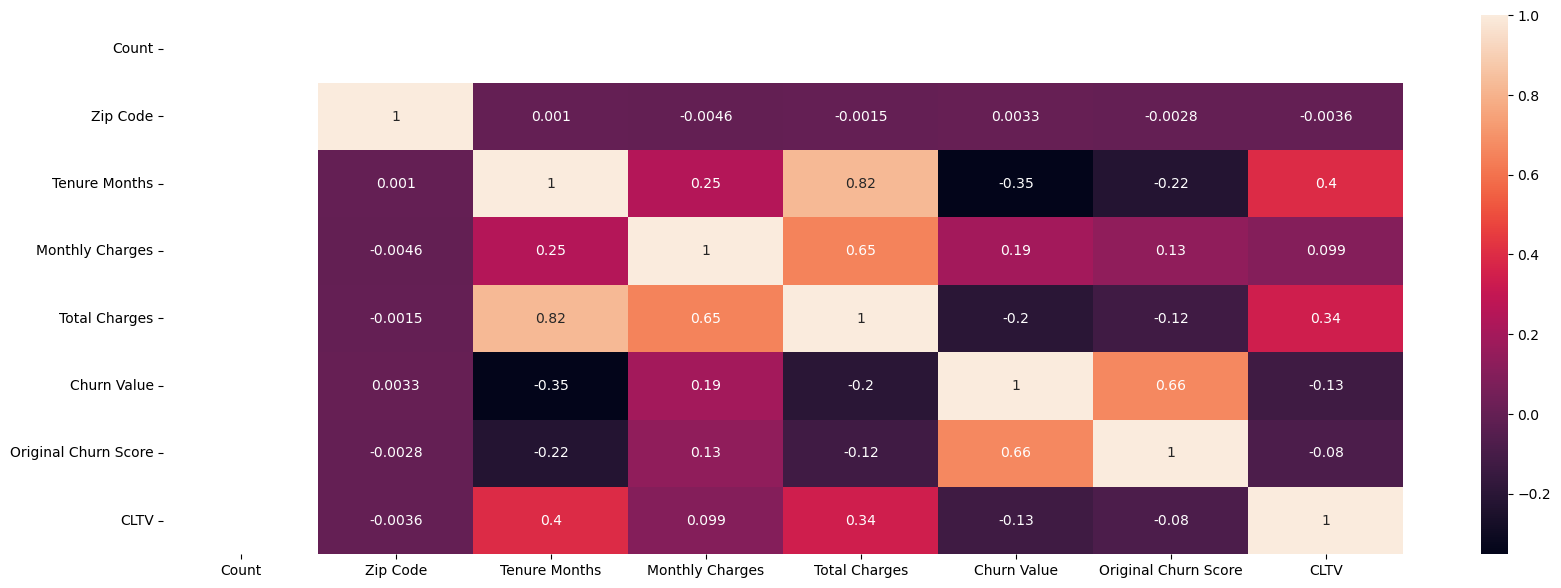

In [181]:
numeric_columns = df.select_dtypes(include=['float','integer'])
sns.heatmap(numeric_columns.corr(), annot=True)
plt.rcParams['figure.figsize'] = (20, 7)
plt.show()

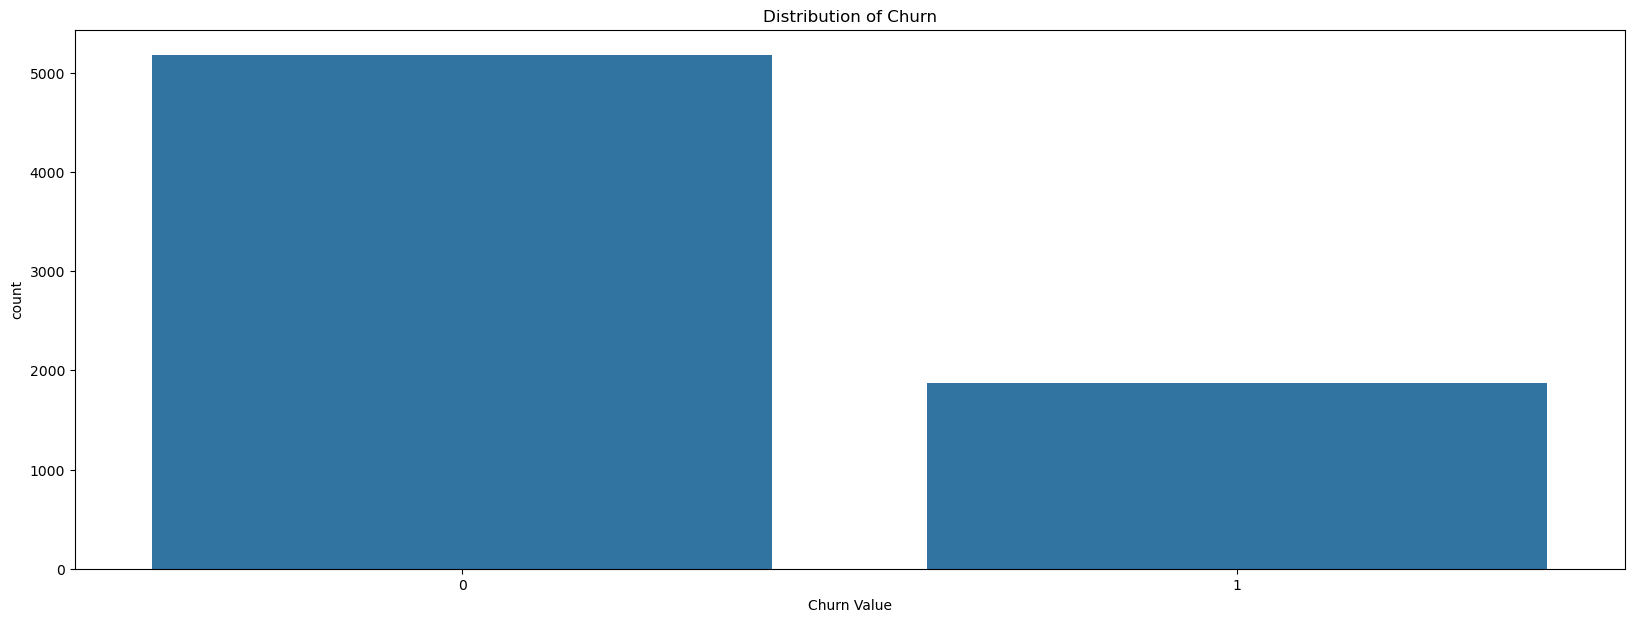

In [248]:
sns.countplot(x='Churn Value', data=df)
plt.title('Distribution of Churn')
plt.show()

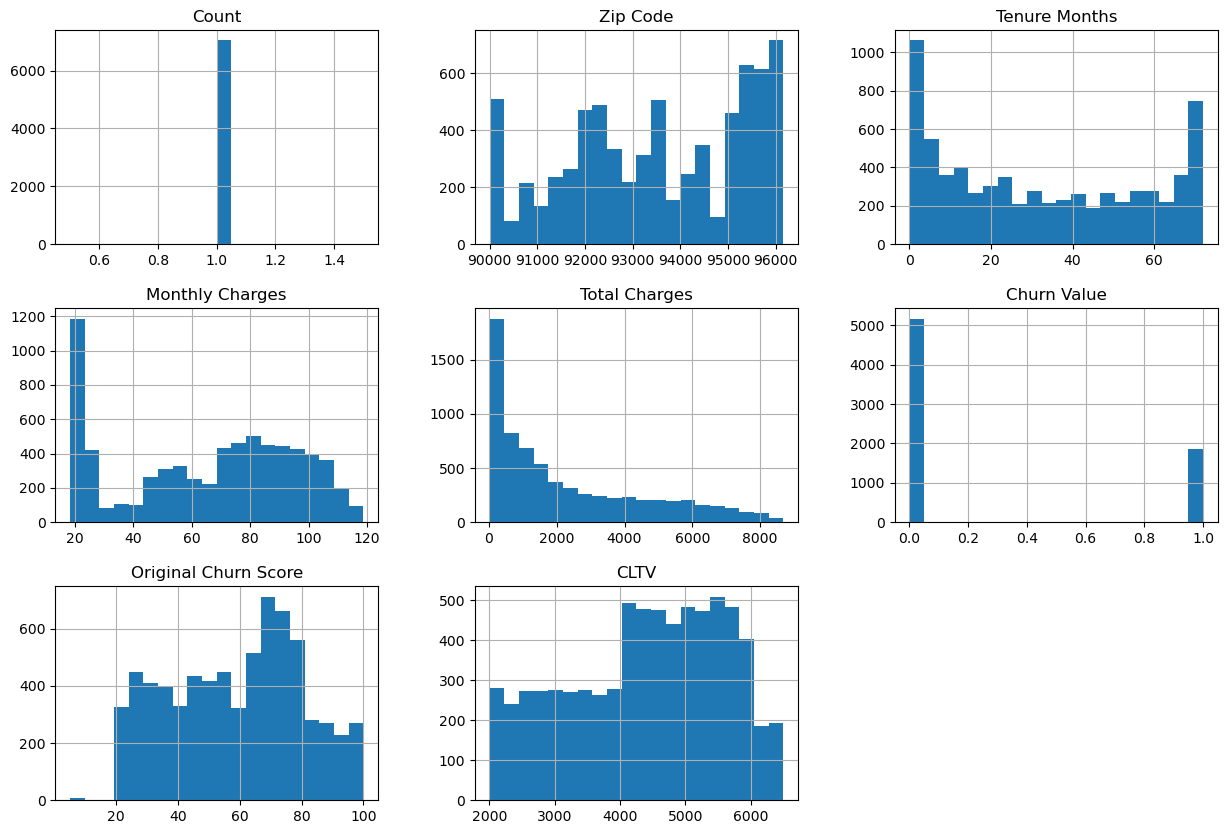

In [250]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=20)
plt.show()

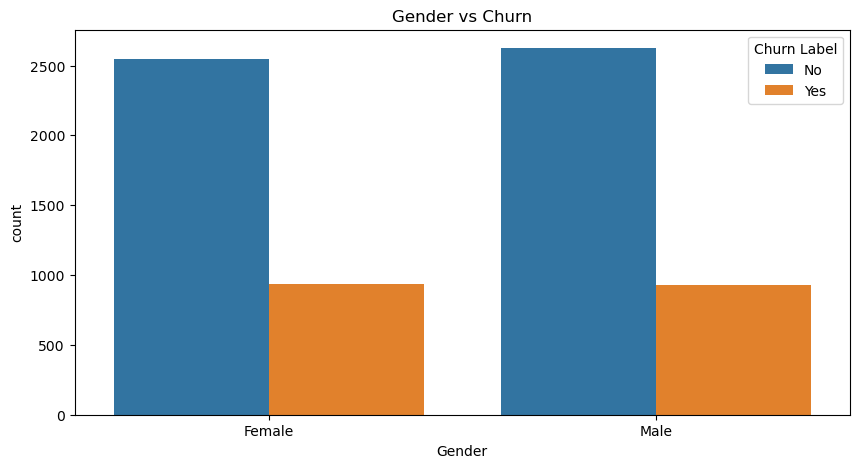

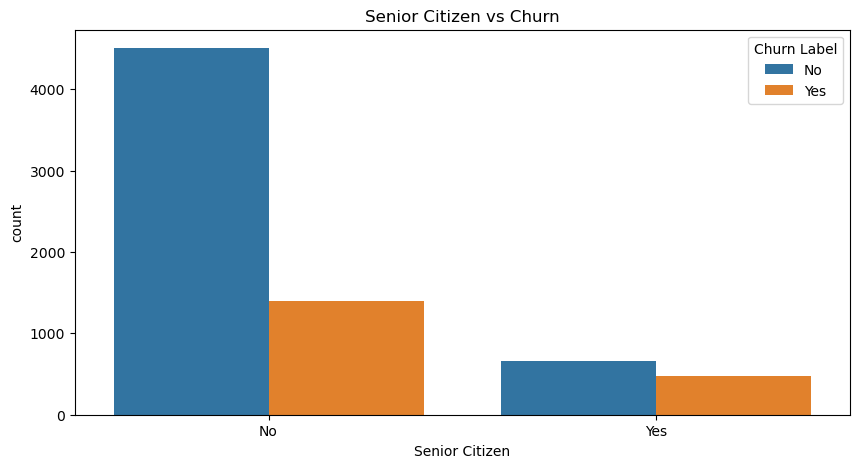

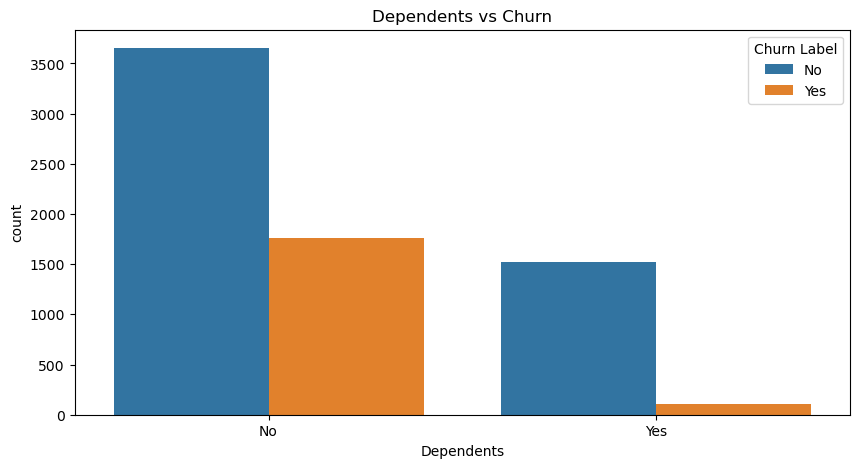

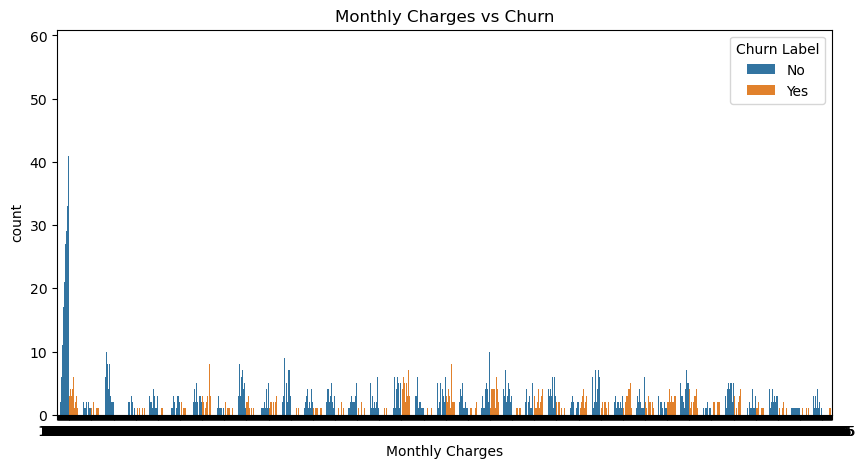

In [259]:
# Plot categorical features against 'Churn'
categorical_features = ['Gender','Senior Citizen','Dependents', 'Monthly Charges']

for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Churn Label', data=df)
    plt.title(f'{column} vs Churn')
    plt.show()


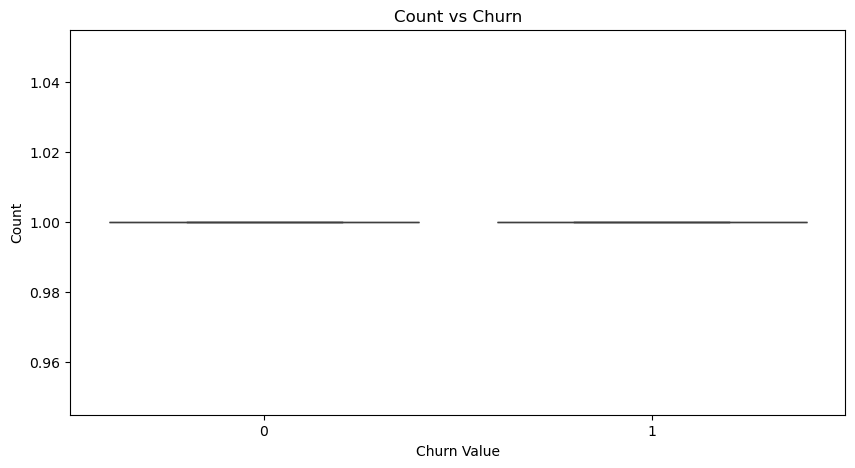

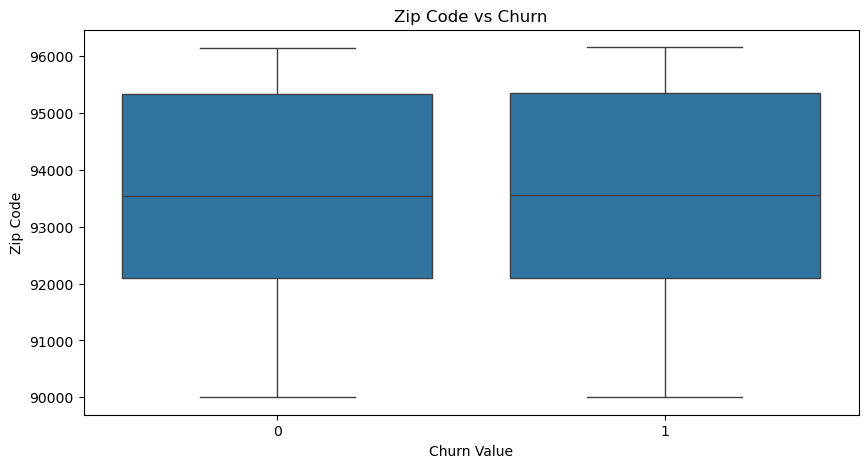

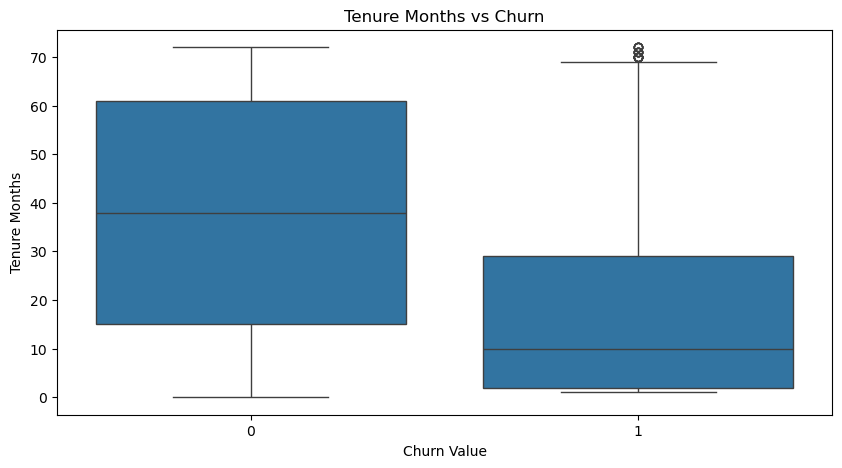

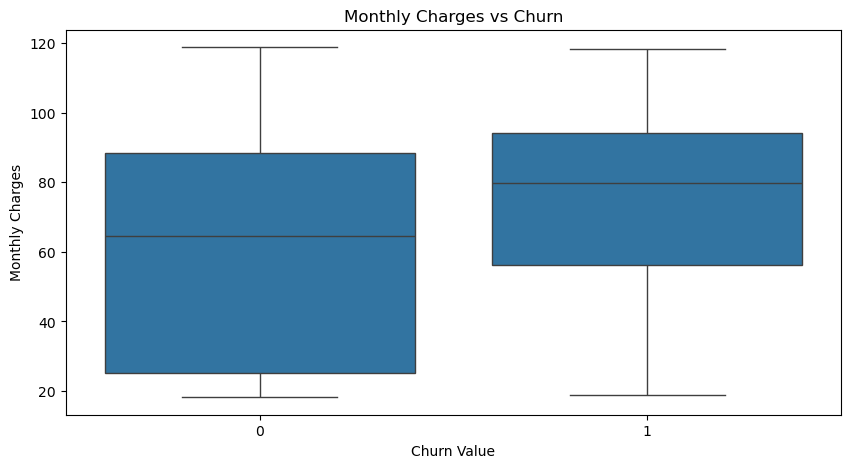

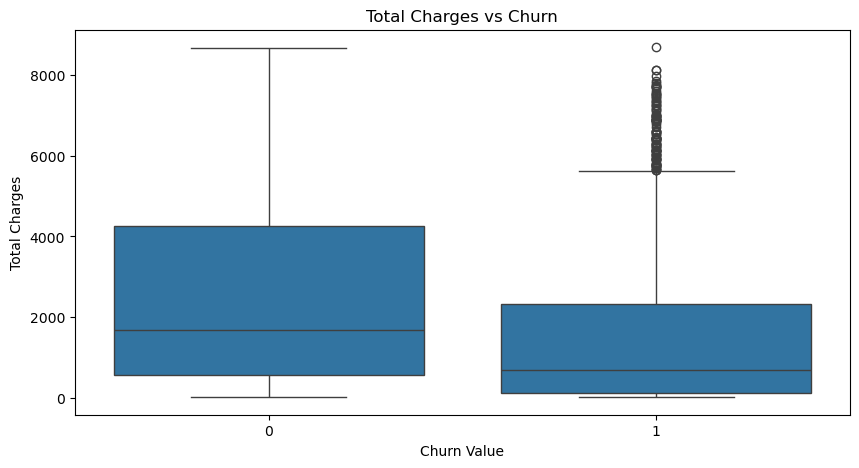

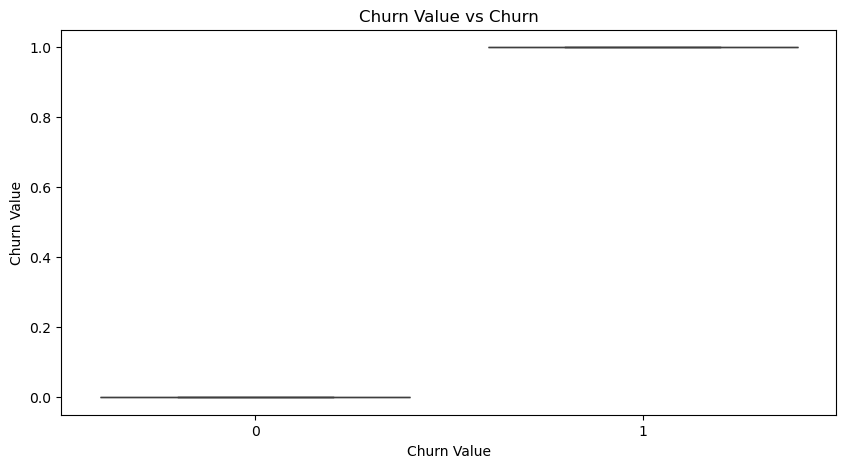

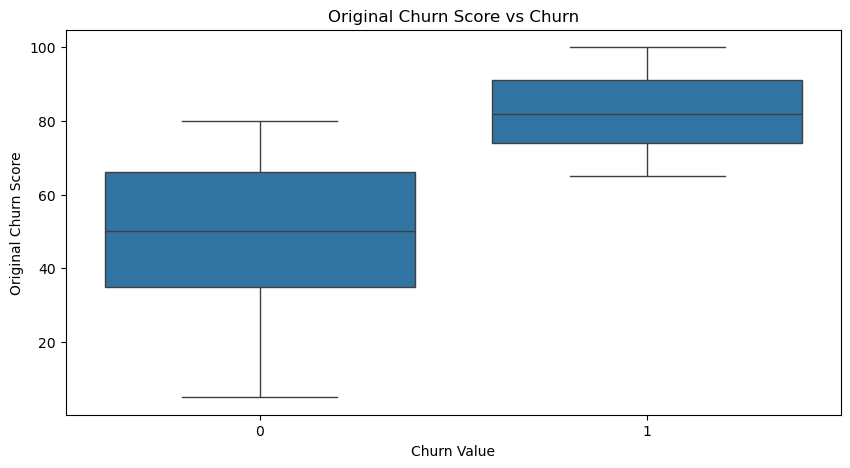

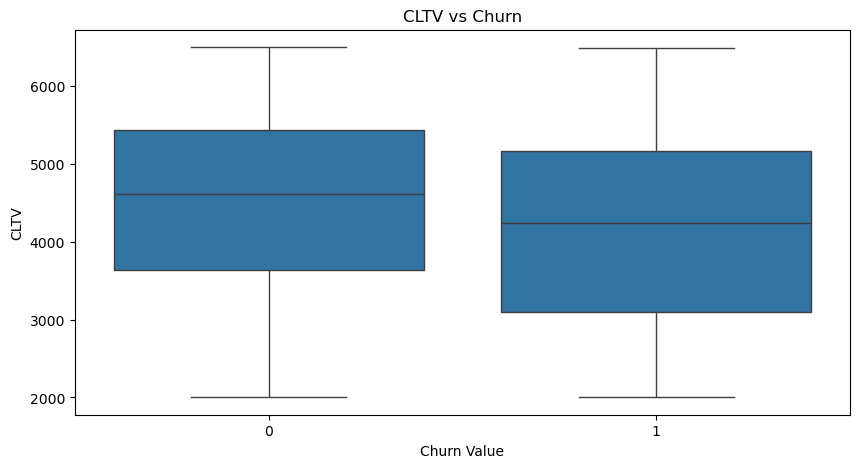

In [265]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn Value', y=column, data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

In [207]:
from scipy.stats import chi2_contingency

# Contingency table for Internet Service and Churn
ct_internet = pd.crosstab(df['Internet Service'], df['Churn Label'])
print(ct_internet)

Churn Label         No   Yes
Internet Service            
DSL               1962   459
Fiber optic       1799  1297
No                1413   113


In [209]:
# Contingency table for Tech Support and Churn
ct_support = pd.crosstab(df['Tech Support'], df['Churn Label'])
print(ct_support)

Churn Label            No   Yes
Tech Support                   
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


In [213]:
# Contingency table for Phone Service and Churn
ct_phone = pd.crosstab(df['Phone Service'], df['Churn Label'])
print(ct_phone )

Churn Label      No   Yes
Phone Service            
No              512   170
Yes            4662  1699


In [217]:
# Chi-square test for Tech Support
chi2_tech_support, p_tech_support, dof_tech_support, ex_tech_support = chi2_contingency(ct_support)
print(f"Tech Support - Chi-Square Statistic: {chi2_tech_support}, P-Value: {p_tech_support}")

Tech Support - Chi-Square Statistic: 828.1970684587394, P-Value: 1.4430840279998987e-180


In [219]:
ct_mcharge = pd.crosstab(df['Monthly Charges'], df['Churn Label'])
print(ct_mcharge)

Churn Label      No  Yes
Monthly Charges         
18.25             1    0
18.40             1    0
18.55             1    0
18.70             2    0
18.75             1    0
...              ..  ...
118.20            1    0
118.35            0    1
118.60            2    0
118.65            1    0
118.75            1    0

[1585 rows x 2 columns]


In [221]:
chi2_monthly_charge, p_monthly_charge, dof_monthly_charge, ex_monthly_charge = chi2_contingency(ct_mcharge)
print(f"Tech Support - Chi-Square Statistic: {chi2_monthly_charge}, P-Value: {p_monthly_charge}")

Tech Support - Chi-Square Statistic: 2123.6091299979576, P-Value: 1.8852727784255517e-18


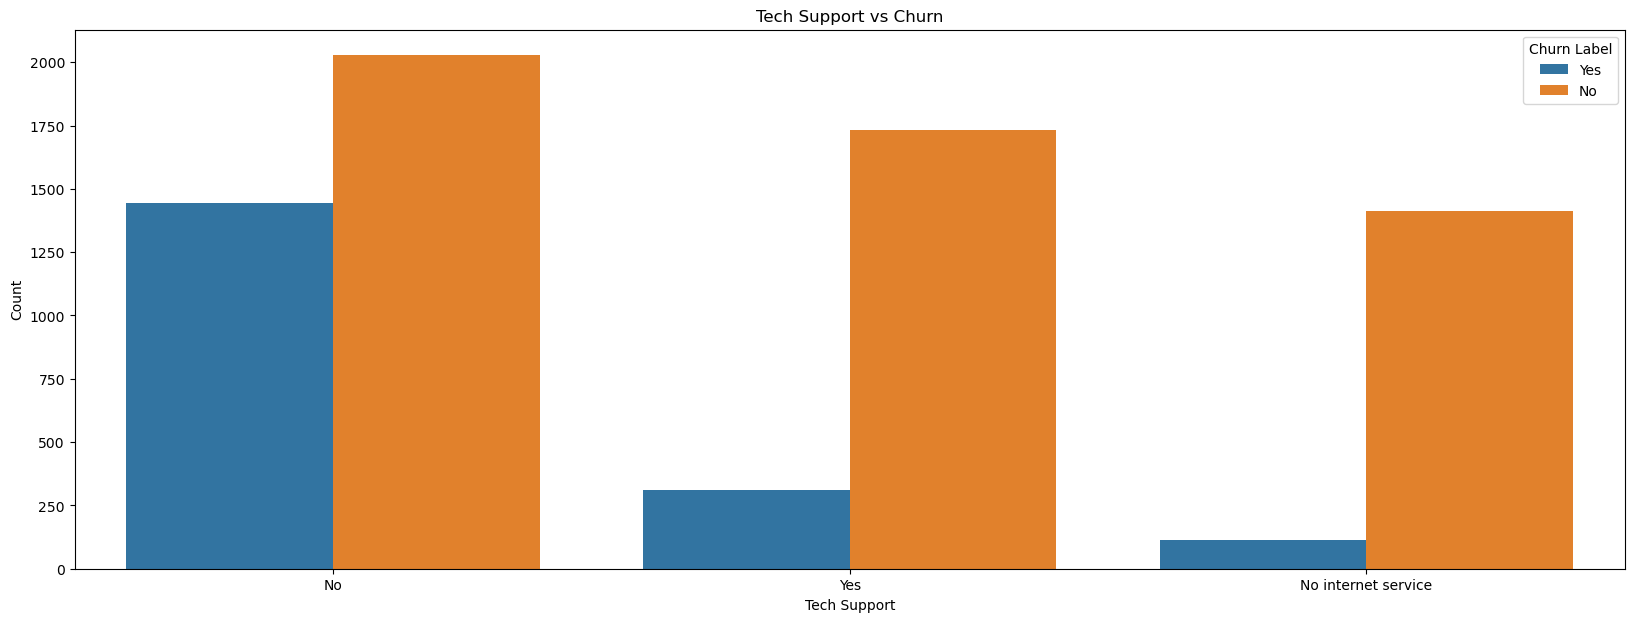

In [223]:
# Bar plot for Tech Support and Churn
sns.countplot(x='Tech Support', hue='Churn Label', data=df)
plt.title('Tech Support vs Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()


In [236]:
# Contingency table for Gender and Churn
ct_gender = pd.crosstab(df['Gender'], df['Churn Label'])
print(ct_gender)

Churn Label    No  Yes
Gender                
Female       2549  939
Male         2625  930


In [238]:
# Contingency table for Senior Citizen and Churn
ct_senior = pd.crosstab(df['Senior Citizen'], df['Churn Label'])
print(ct_senior)

Churn Label       No   Yes
Senior Citizen            
No              4508  1393
Yes              666   476


In [240]:
# Contingency table for Dependents and Churn
ct_dependent = pd.crosstab(df['Dependents'], df['Churn Label'])
print(ct_dependent)

Churn Label    No   Yes
Dependents             
No           3653  1763
Yes          1521   106


## Logistic Regression Modeling

In [295]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [297]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [299]:
# Split the data into features and target variable
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [313]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
# As this was a large dataset, it needed to be scaled.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [317]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [319]:
# Make predictions
y_pred = model.predict(X_test_scaled)

## Model Evaluation

In [321]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[1009    0]
 [   0  400]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

